In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pt
import numpy as np

## Showing DF

In [4]:
# import csv 

df_afp = pd.read_csv('africa_food_prices.csv')
df_afp

,iso_code,country_id,country,state_id,state,market_id,market,produce_id,produce,market_type,um_unit_id,quantity,month,year,price,mp_commoditysource
0,15427,4,Algeria,344,Alger,1794,Algiers,52,Rice,Retail,5,KG,4,2015,90.0000,NaN
1,15428,4,Algeria,344,Alger,1794,Algiers,52,Rice,Retail,5,KG,5,2015,96.0000,NaN
2,15429,4,Algeria,344,Alger,1794,Algiers,52,Rice,Retail,5,KG,6,2015,96.0000,NaN
3,15430,4,Algeria,344,Alger,1794,Algiers,52,Rice,Retail,5,KG,7,2015,83.0000,NaN
4,15431,4,Algeria,344,Alger,1794,Algiers,52,Rice,Retail,5,KG,8,2015,80.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956774,2050633,271,Zimbabwe,3444,Midlands,5594,Mbilashaba,432,Beans (sugar),Retail,5,KG,6,2021,233.3333,NaN
956775,2050634,271,Zimbabwe,3444,Midlands,5594,Mbilashaba,539,Toothpaste,Retail,116,100 ML,6,2021,112.5000,NaN
956776,2050635,271,Zimbabwe,3444,Midlands,5594,Mbilashaba,540,Laundry soap,Retail,5,KG,6,2021,114.0000,NaN
956777,2050636,271,Zimbabwe,3444,Midlands,5594,Mbilashaba,541,Handwash soap,Retail,66,250 G,6,2021,59.5000,NaN


In [5]:
# info of the df

df_afp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956779 entries, 0 to 956778
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   iso_code            956779 non-null  int64  
 1   country_id          956779 non-null  int64  
 2   country             956779 non-null  object 
 3   state_id            956779 non-null  int64  
 4   state               830101 non-null  object 
 5   market_id           956779 non-null  int64  
 6   market              956779 non-null  object 
 7   produce_id          956779 non-null  int64  
 8   produce             956779 non-null  object 
 9   market_type         956779 non-null  object 
 10  um_unit_id          956779 non-null  int64  
 11  quantity            956779 non-null  object 
 12  month               956779 non-null  int64  
 13  year                956779 non-null  int64  
 14  price               956779 non-null  float64
 15  mp_commoditysource  0 non-null    

In [6]:
df_afp.shape

(956779, 16)

In [10]:
# selecting columns needed and overwriting previous df

df_afp = df_afp[['country','state','market','market_type','produce','price','quantity','year','month',]]
df_afp

,country,state,market,market_type,produce,price,quantity,year,month
0,Algeria,Alger,Algiers,Retail,Rice,90.0000,KG,2015,4
1,Algeria,Alger,Algiers,Retail,Rice,96.0000,KG,2015,5
2,Algeria,Alger,Algiers,Retail,Rice,96.0000,KG,2015,6
3,Algeria,Alger,Algiers,Retail,Rice,83.0000,KG,2015,7
4,Algeria,Alger,Algiers,Retail,Rice,80.0000,KG,2015,8
...,...,...,...,...,...,...,...,...,...
956774,Zimbabwe,Midlands,Mbilashaba,Retail,Beans (sugar),233.3333,KG,2021,6
956775,Zimbabwe,Midlands,Mbilashaba,Retail,Toothpaste,112.5000,100 ML,2021,6
956776,Zimbabwe,Midlands,Mbilashaba,Retail,Laundry soap,114.0000,KG,2021,6
956777,Zimbabwe,Midlands,Mbilashaba,Retail,Handwash soap,59.5000,250 G,2021,6


In [11]:
df_afp.dtypes

country         object
state           object
market          object
market_type     object
produce         object
price          float64
quantity        object
year             int64
month            int64
dtype: object

In [12]:
# check for null values

df_afp.isnull().any()

country        False
state           True
market         False
market_type    False
produce        False
price          False
quantity       False
year           False
month          False
dtype: bool

## Research Questions

### 1. What is the average price of produce in 5 states?

In [14]:
# displaying the unique state values

all_states = df_afp['state'].unique()
all_states

array(['Alger', 'Tindouf', 'Luanda', 'Lunda Norte', 'Alibori', 'Atakora',
       'Atlantique', 'Borgou', 'Collines', 'Couffo', 'Donga', 'Littoral',
       'Mono', 'Oueme', 'Plateau', 'Zou', 'Bubanza', 'Bujumbura Mairie',
       'Bujumbura Rural', 'Bururi', 'Cankuzo', 'Cibitoke', 'Gitega',
       'Karuzi', 'Kayanza', 'Kirundo', 'Makamba', 'Muramvya', 'Muyinga',
       'Mwaro', 'Ngozi', 'Rutana', 'Ruyigi', 'Adamaoua', 'Centre', 'Est',
       'Extreme - Nord', 'Nord', 'Nord - Ouest', 'Ouest', 'Sud - Ouest',
       'Santiago', 'Santo Antao', 'Sao Vicente', 'Bamingui-Bangoran',
       'Haut-Mbomou', 'Haute-Kotto', 'Kémo', 'Lobaye', 'Mambéré-Kadéï',
       'Mbomou', 'Nana-Gribizi', 'Nana-Mambéré', "Ombella M'Poko",
       'Ouaka', 'Ouham', 'Ouham Pendé', 'Sangha-Mbaéré', 'Vakaga',
       'Bangui', nan, 'Bouenza', 'Cuvette', 'Lekoumou', 'Likouala',
       'Pool', 'Point-Noire', 'Brazzaville', 'Ali Sabieh', 'Dikhil',
       'Djibouti', 'Obock', 'Tadjourah', 'Maekel', 'Semenawi Keih Bahri',
   

In [98]:
# group the data by the state column, calculate the mean price for each state and create a barchart

avg_price_by_state = df_afp.groupby('state')['price'].mean()
avg_price_by_state = avg_price_by_state.reindex(all_states)

avg_price_by_state = avg_price_by_state.head()

avg_price_by_state


state
Alger           142.485629
Tindouf         170.107265
Luanda         1046.435495
Lunda Norte     650.416667
Alibori         449.812558
Name: price, dtype: float64

In [26]:
import matplotlib.pyplot as plt

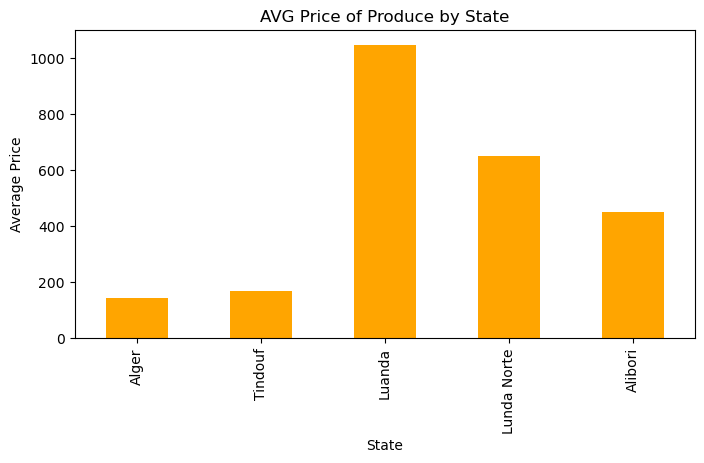

In [99]:
## visualizing the avg prices

avg_price_by_state.plot(kind='bar', color='orange',
                   xlabel='State', ylabel='Average Price',
                   title= 'AVG Price of Produce by State',
                       figsize=(8,4))
# save plot
plt.savefig('avg_price_bar_state.png')

### 2. How do prices vary across different market types?

In [29]:
# group the data by the market type column, calculate the mean price for each market type 
# and visualize the average prices using a bar chart

avg_price_by_market_type = df_afp.groupby('market_type')['price'].mean()
avg_price_by_market_type


market_type
Producer      666.338710
Retail       3767.706512
Wholesale    8671.729344
Name: price, dtype: float64

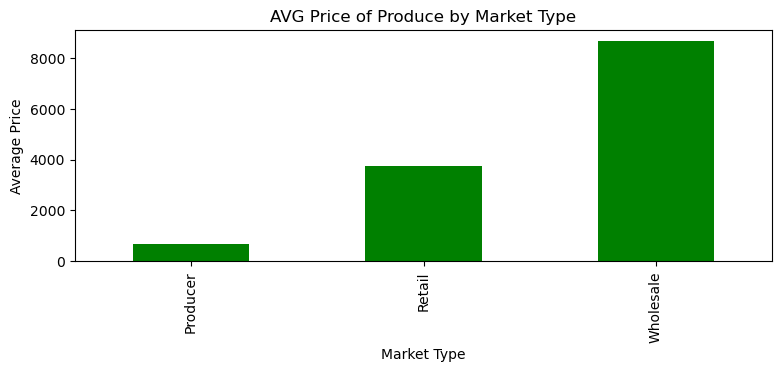

In [42]:
# visualizing the avg prices

avg_price_by_market_type.plot(kind='bar', color='green',
                   xlabel='Market Type', ylabel='Average Price',
                   title= 'AVG Price of Produce by Market Type',
                       figsize=(9,3))
# save plot
plt.savefig('avg_price_bar_market_type.png')

### 3. Are there any seasonal price trends in produce price throughout the year?

In [41]:
# group the data by the month column, calculate the mean price for each month
# and visualize the average prices over the months using a line plot

avg_price_by_month = df_afp.groupby('month')['price'].mean()
avg_price_by_month

month
1     3998.546120
2     4150.515493
3     4254.507753
4     4126.432353
5     3954.714578
6     4150.218301
7     4205.183762
8     4268.548730
9     4151.361542
10    4311.475758
11    4149.381247
12    3828.384684
Name: price, dtype: float64

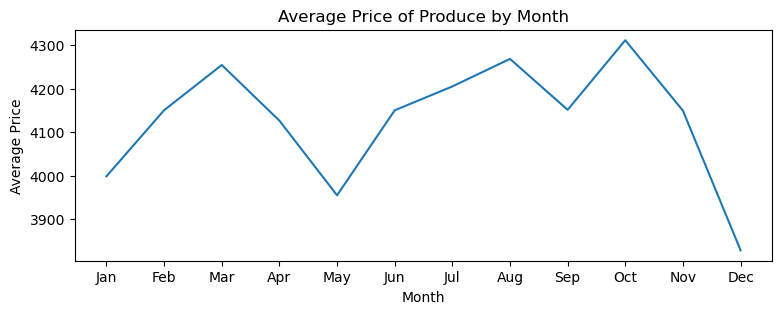

In [74]:
# visualizing the avg prices

plt.figure(figsize=(9,3))
avg_price_by_month.plot(kind='line')
plt.title('Average Price of Produce by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 
'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 
'Nov', 'Dec'])
                        

# save plot
plt.savefig('avg_price_line_month.png')

### 4. How does the avg price of produce vary across different country?

In [100]:
# group the data by the country column, calculate the mean price for each market
# and visualize the average prices across diff market using bar chart

avg_price_by_country = df_afp.groupby('country')['price'].mean()
avg_price_by_country

country
Algeria                        164.961907
Angola                        1038.963442
Benin                          612.744978
Burundi                       2516.897501
Cameroon                     12194.504486
Cape Verde                      87.230546
Central African Republic       980.444644
Chad                          6402.038909
Congo                         1461.473620
Djibouti                       802.733808
Egypt                           19.291319
Eritrea                       2272.000000
Ethiopia                      1219.600790
Gabon                          691.063492
Gambia                          56.864125
Ghana                          106.865747
Guinea                       10879.303370
Guinea-Bissau                  877.138516
Kenya                         1191.952042
Lesotho                         33.346925
Liberia                       1273.684710
Libya                            5.647125
Madagascar                    2549.656122
Malawi                    

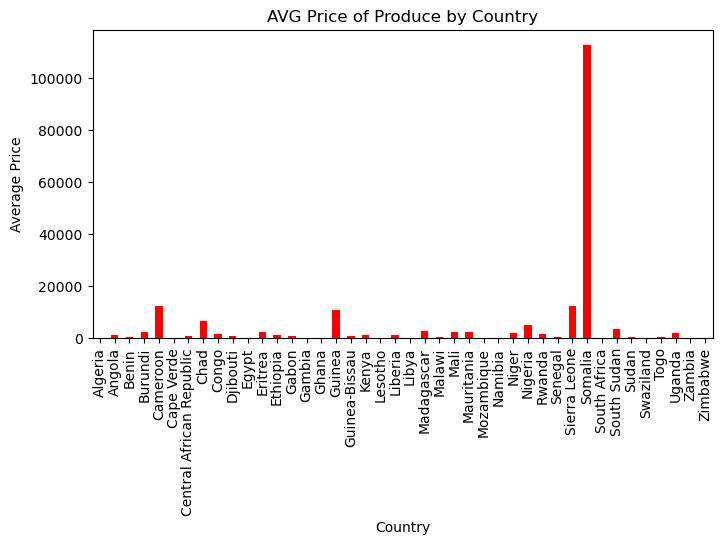

In [106]:
## visualizing the avg prices

avg_price_by_country.plot(kind='bar', color='red',
                   xlabel='Country', ylabel='Average Price',
                   title= 'AVG Price of Produce by Country',
                       figsize=(8,4))
# save plot
plt.savefig('avg_price_bar_country.png')

### 4. How have produce prices changed over the years?

In [107]:
# group the data by the year column, calculate the mean price for each year
# and visualize the average prices over the year using a line plot

avg_price_by_year = df_afp.groupby('year')['price'].mean()
avg_price_by_year

year
1990      98.357143
1991     101.854478
1992      94.936554
1993      87.732039
1994     112.857865
1995     134.738225
1996     430.808201
1997    1966.258019
1998    5552.932034
1999    2689.108951
2000    6435.112337
2001    8926.238971
2002    9663.812376
2003    5835.367812
2004    7544.605287
2005    5700.050776
2006    4777.753839
2007    3774.609515
2008    5156.559314
2009    5624.942196
2010    6015.880769
2011    5598.227172
2012    5078.135941
2013    4474.556248
2014    4747.189996
2015    5140.182954
2016    6092.870738
2017    3612.769754
2018    3147.144019
2019    3013.296170
2020    3063.475541
2021    3064.823339
Name: price, dtype: float64

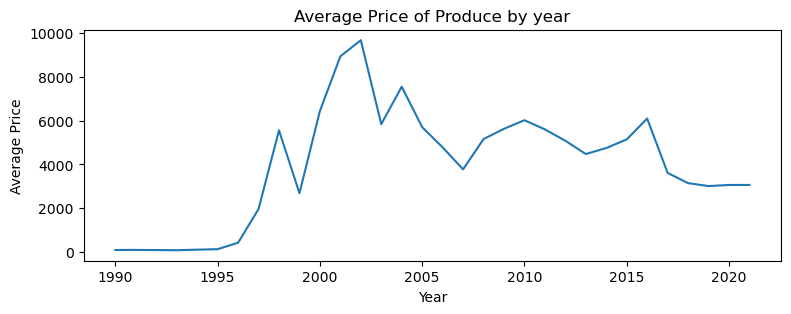

In [110]:
# visualizing the avg prices

plt.figure(figsize=(9,3))
avg_price_by_year.plot(kind='line')
plt.title('Average Price of Produce by year')
plt.xlabel('Year')
plt.ylabel('Average Price')

# save plot
plt.savefig('avg_price_line_year.png')